# Práctica 3 : Regresión logística multi-clase y redes neuronales

Guillermo García Patiño Lenza y Mario Quiñones Pérez

In [224]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize as opt
from scipy.io import loadmat

## Parte 1: Regresión logística multi-clase

### Carga y visualización de los datos

In [225]:
def cargaDatos(fichero):
    datos = loadmat(fichero)
    return datos

In [226]:
def mostrarNdatos(datos, N = 10):
    X = datos['X'] 
    Y = datos['y']
    
    sample = np.random.choice(X.shape[0], 10)
    plt.imshow(X[sample, :].reshape(-1,20).T)
    plt.axis('off')

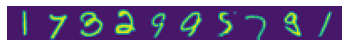

In [227]:
mostrarNdatos(cargaDatos("ex3data1.mat"), 10)

### Clasificación de uno frente a todos

In [228]:
def oneVsAll (X, y, num_etiquetas, reg):
    """
    oneVsAll entrena varios clasificadores por regresión logística con término
    de regularización 'reg' y devuelve el resultado en una matriz , donde
    la fila i−ésima corresponde al clasificador de la etiqueta i−ésima
    """
    
    Theta = list()
    coste = list()
    
    for i in range(1,num_etiquetas+1):
        aux = (y == i) * 1
        gr = optimiza_reg(X, aux, reg)
        
        Theta.append(gr)
        
    print(Theta)

In [246]:
def prueba():
    datos = cargaDatos("ex3data1.mat")
    X = datos['X'] 
    y = datos['y']
    
    oneVsAll (X, y, 1, 1)

In [247]:
prueba()

coste: 0.6931453805617429
[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [233]:
def preparaFunciones(Lambda):
    c = lambda Theta,X,Y : coste_reg(Theta,X,Y,Lambda)
    gr = lambda Theta,X,Y : gradiente_reg(Theta,X,Y,Lambda)
    
    return (c,gr)

In [234]:
def sigmoide(Z):
    sigmoide = 1 / (1 + np.exp(-Z))
    return sigmoide

In [235]:
def normalizar(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return(X_norm, mu, sigma)

In [297]:
def coste_reg(Theta,X,Y, Lambda):
    c = coste(Theta,X,Y)
    m = X.shape[0]
    e = 0
    
    for t in range(1,len(Theta)):
        e += Theta[t]**2
        
    return c + (Lambda/(2*m))*e

def coste(Theta, X, Y):
    G = sigmoide(np.dot(X, Theta))
    sum1 = np.dot(np.ravel(Y), np.log(G))
    sum2 = np.dot((1-np.ravel(Y)), np.log(1 - G + 1e-6))
    return (-1 / X.shape[0]) * (sum1 + sum2)

In [238]:
def gradiente_reg(Theta,X,Y,Lambda):
    m = X.shape[0]
    gr = gradiente(Theta,X,Y)
    theta2 = (Lambda/m)*Theta
    return (gr + theta2)

def gradiente(Theta, X, Y):
    m = X.shape[0]
    G = sigmoide( np.matmul(X,Theta) )
    gradiente  = (1 / len(Y)) * np.matmul(X.T, G - np.ravel(y))
    return gradiente

In [296]:
def optimiza_reg(X, y, Lambda):
    c, gr = preparaFunciones(Lambda)
    n = len(y)
    X = np.hstack([np.ones([n,1]), X])
    T = np.zeros(X.shape[1])

    result = opt.fmin_tnc(func = c, x0 = T, fprime = gr, args = (X, y))
    c_f = coste(result[0], X, y)
    print("coste:", c_f)
    return result[0]

## Parte 2: Redes neuronales

In [249]:
datos = loadmat('ex3data1.mat')
weights = loadmat('ex3weights.mat')
theta1, theta2 = weights['Theta1'], weights['Theta2']

In [294]:
def prueba_neurona(datos, cargas):
    X = datos['X'] 
    Y = datos['y']
    n = len(y)
    theta1, theta2 = cargas['Theta1'], cargas['Theta2']
    
    X = np.hstack([np.ones([n,1]), X])
    
    Oculta = sigmoide(np.dot(X, theta1.T))
    Oculta = np.hstack([np.ones([n,1]), Oculta])
    
    Resultado = sigmoide(np.dot(Oculta, theta2.T))
    comparador = np.argmax(Resultado, axis = 1)
    
    return (sum(comparador == np.ravel(y-1))/n*100)
    
    

In [295]:
prueba_neurona(loadmat('ex3data1.mat'), loadmat('ex3weights.mat'))

97.52